In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
Hockey=pd.read_excel("C:/Users/trent/OneDrive/Documents/Repositories/Team-Salary-Vs-Performance-Regression/data/NHL pay and performance.xlsx")

In [3]:
Hockey.describe()

,season,wpc,salaries
count,301.000000,301.000000,3.010000e+02
mean,2013.514950,0.500000,6.210188e+07
std,2.883969,0.091339,9.645558e+06
min,2009.000000,0.256098,2.972750e+07
25%,2011.000000,0.426829,5.640000e+07
50%,2014.000000,0.500000,6.409363e+07
75%,2016.000000,0.560976,6.955369e+07
max,2018.000000,0.750000,7.820526e+07


In [4]:
Hockey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team      301 non-null    object 
 1   season    301 non-null    int64  
 2   wpc       301 non-null    float64
 3   salaries  301 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 9.5+ KB


In [5]:
Sumsal = Hockey.groupby(['season'])['salaries'].sum().reset_index().rename(columns={'salaries':'allsal'})
Sumsal

,season,allsal
0,2009,1541615281
1,2010,1552508107
2,2011,1625195685
3,2012,2083240145
4,2013,1875078749
5,2014,1870670657
6,2015,1936588513
7,2016,2010863335
8,2017,2044256803
9,2018,2152647770


In [6]:
Hockey = pd.merge(Hockey, Sumsal, on=['season'], how='left')
display(Hockey)

,Team,season,wpc,salaries,allsal
0,Anaheim Mighty Ducks,2009,0.512195,49838000,1541615281
1,Atlanta Flames/Thrashers,2009,0.426829,34262500,1541615281
2,Boston Bruins,2009,0.646341,51535000,1541615281
3,Buffalo Sabres,2009,0.500000,52225700,1541615281
4,Calgary Flames,2009,0.560976,63100000,1541615281
...,...,...,...,...,...
296,Tampa Bay Lightning,2018,0.658537,73324166,2152647770
297,Toronto Arenas/St. Patricks/Maple Leafs,2018,0.597561,63934167,2152647770
298,Vancouver Canucks,2018,0.378049,72819166,2152647770
299,Washington Capitals,2018,0.597561,74965962,2152647770


In [7]:
Hockey['relsal']= Hockey['salaries']/Hockey['allsal']

<Axes: xlabel='relsal', ylabel='wpc'>

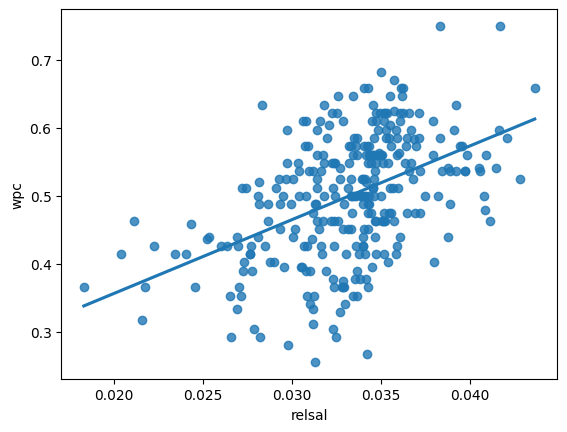

In [8]:
sns.regplot(x="relsal", y="wpc", data = Hockey, ci=False)

In [9]:
wpcsal1_lm = smf.ols(formula = 'wpc ~ relsal', data=Hockey).fit()
print(wpcsal1_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     84.33
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           7.17e-18
Time:                        20:55:08   Log-Likelihood:                 331.14
No. Observations:                 301   AIC:                            -658.3
Df Residuals:                     299   BIC:                            -650.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1404      0.039      3.560      0.0

In [10]:
Hockey.sort_values(by=['Team','season'], ascending=True)

,Team,season,wpc,salaries,allsal,relsal
0,Anaheim Mighty Ducks,2009,0.512195,49838000,1541615281,0.032328
30,Anaheim Mighty Ducks,2010,0.475610,55207500,1552508107,0.035560
60,Anaheim Mighty Ducks,2011,0.573171,53977500,1625195685,0.033213
90,Anaheim Mighty Ducks,2012,0.414634,74655277,2083240145,0.035836
120,Anaheim Mighty Ducks,2013,0.625000,67064166,1875078749,0.035766
...,...,...,...,...,...,...
179,Winnipeg Jets,2014,0.451220,63682588,1870670657,0.034043
209,Winnipeg Jets,2015,0.524390,63322574,1936588513,0.032698
239,Winnipeg Jets,2016,0.426829,52338400,2010863335,0.026028
269,Winnipeg Jets,2017,0.487805,64113622,2044256803,0.031363


In [11]:
Hockey['wpc_lag'] = Hockey.groupby('Team')['wpc'].shift(1)
Hockey

,Team,season,wpc,salaries,allsal,relsal,wpc_lag
0,Anaheim Mighty Ducks,2009,0.512195,49838000,1541615281,0.032328,NaN
1,Atlanta Flames/Thrashers,2009,0.426829,34262500,1541615281,0.022225,NaN
2,Boston Bruins,2009,0.646341,51535000,1541615281,0.033429,NaN
3,Buffalo Sabres,2009,0.500000,52225700,1541615281,0.033877,NaN
4,Calgary Flames,2009,0.560976,63100000,1541615281,0.040931,NaN
...,...,...,...,...,...,...,...
296,Tampa Bay Lightning,2018,0.658537,73324166,2152647770,0.034062,0.512195
297,Toronto Arenas/St. Patricks/Maple Leafs,2018,0.597561,63934167,2152647770,0.029700,0.487805
298,Vancouver Canucks,2018,0.378049,72819166,2152647770,0.033828,0.365854
299,Washington Capitals,2018,0.597561,74965962,2152647770,0.034825,0.670732


In [12]:
wpcsal2_lm = smf.ols(formula = 'wpc ~wpc_lag + relsal', data=Hockey).fit()
print(wpcsal2_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     53.13
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           3.87e-20
Time:                        20:57:04   Log-Likelihood:                 306.15
No. Observations:                 269   AIC:                            -606.3
Df Residuals:                     266   BIC:                            -595.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0716      0.043      1.656      0.0

In [13]:
wpcsal3_lm = smf.ols(formula = 'wpc ~wpc_lag + relsal +C(Team)', data=Hockey).fit()
print(wpcsal3_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     5.715
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           4.55e-16
Time:                        20:57:29   Log-Likelihood:                 338.12
No. Observations:                 269   AIC:                            -610.2
Df Residuals:                     236   BIC:                            -491.6
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [14]:
wpcsal4_lm = smf.ols(formula = "wpc ~  relsal +C(Team)", data=Hockey).fit()
print(wpcsal4_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     6.366
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           7.26e-19
Time:                        20:58:34   Log-Likelihood:                 378.83
No. Observations:                 301   AIC:                            -691.7
Df Residuals:                     268   BIC:                            -569.3
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [ ]:
# Calculates the expected win percentage for a 2% (lowest), 3.25%(mid) and 4.5%(highest) in relative salary
print(0.256 + 8.76*0.02)
print(0.256 + 8.76*0.0325)
print(0.256 + 8.76*0.045)

0.4312
0.5407
0.6502
